# cifar 10 cnn 실습

- CCP CP CP CP F D D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime    # 수행 시간 측정을 위해.

from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils


# 1. 데이터 준비 및 전처리

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


## 1-1. 데이터 생김새 파악

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
y_train            # 다중 분류를 하려면 원 핫 인코딩을 해주어야 하기 때문에 sparse-categorical-crossentropy 사용

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## 1-2. 레이블 개수 확인하기

- 0~9 로 10개

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

## 1-3. 모델 학습
- CCP CP CP CP F DDD D

- Dropout : 0.25
- learning_rate : 1e-5

In [ ]:
model = Sequential()

# CCP
model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# CP
model.add(Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# CP
model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# CP
model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# FC
# 입력층
model.add(Flatten())

# 은닉층
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))

# 출력층 -> 레이블이 10개임. 즉, 10개 중 하나로 다중 분류
model.add(Dense(10, activation="softmax"))

# compile
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])


tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) #10번 동안 개선이 없으면, 학습률을 절반으로 자동 조정

result = model.fit(X_train, y_train, epochs=100, validation_split=.2, batch_size=500, callbacks=[tf_reduce])

Epoch 1/100
80/80 [==============================] - 17s 43ms/step - loss: 2.3019 - accuracy: 0.1035 - val_loss: 2.3004 - val_accuracy: 0.0966 - lr: 1.0000e-05
Epoch 2/100
80/80 [==============================] - 3s 38ms/step - loss: 2.2997 - accuracy: 0.1038 - val_loss: 2.2989 - val_accuracy: 0.1145 - lr: 1.0000e-05
Epoch 3/100
80/80 [==============================] - 3s 40ms/step - loss: 2.2969 - accuracy: 0.1063 - val_loss: 2.2971 - val_accuracy: 0.1202 - lr: 1.0000e-05
Epoch 4/100
80/80 [==============================] - 3s 37ms/step - loss: 2.2939 - accuracy: 0.1108 - val_loss: 2.2950 - val_accuracy: 0.1213 - lr: 1.0000e-05
Epoch 5/100
80/80 [==============================] - 3s 39ms/step - loss: 2.2900 - accuracy: 0.1111 - val_loss: 2.2915 - val_accuracy: 0.1214 - lr: 1.0000e-05
Epoch 6/100
80/80 [==============================] - 3s 40ms/step - loss: 2.2837 - accuracy: 0.1135 - val_loss: 2.2865 - val_accuracy: 0.1269 - lr: 1.0000e-05
Epoch 7/100
80/80 [==========================

## 1-4. 모델 결과 평가 및 시각화

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.5623 - accuracy: 0.4303


[1.5623019933700562, 0.4302999973297119]

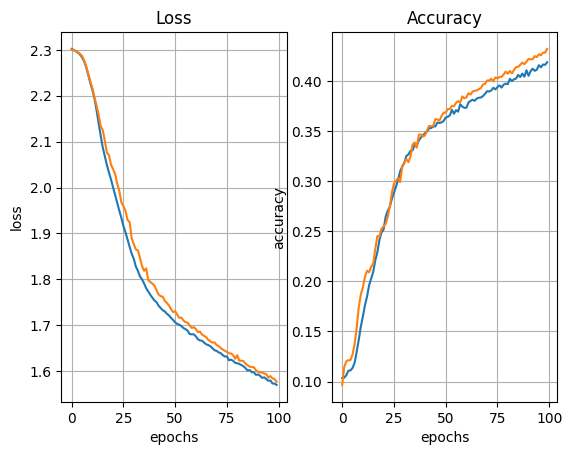

In [ ]:
plt.figsize=(12,6)

# 시각화
plt.subplot(1,2,1)

plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label="val_loss")

plt.subplot(1,2,2)

plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="accuracy")
plt.plot(result.history['val_accuracy'], label="val_accuracy")

## 그래프를 본 결과, 과적합은 없으나 정확도가 낮음
-> 튜닝이 필요해 보임


# 2. 튜닝

## 2-1. 정확도를 높이기 위한 튜닝 1

- CCP CCP CP CP F DDD D 로 변경 (모델의 복잡도 증가)

- kernel_initialize = "he_normal" 초기 가중치 초기화
- 학습률: 1e-5 -> 1e-3

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=0.001), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=100, validation_split=.2,  batch_size=1000, callbacks=[tf_reduce])


Epoch 1/100
40/40 [==============================] - 8s 111ms/step - loss: 2.1379 - accuracy: 0.1850 - val_loss: 1.9706 - val_accuracy: 0.2672 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 4s 94ms/step - loss: 1.8605 - accuracy: 0.3046 - val_loss: 1.7226 - val_accuracy: 0.3539 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 4s 97ms/step - loss: 1.6816 - accuracy: 0.3693 - val_loss: 1.6279 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 4s 98ms/step - loss: 1.5734 - accuracy: 0.4146 - val_loss: 1.4776 - val_accuracy: 0.4497 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 4s 97ms/step - loss: 1.4733 - accuracy: 0.4507 - val_loss: 1.4599 - val_accuracy: 0.4615 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 4s 96ms/step - loss: 1.4085 - accuracy: 0.4792 - val_loss: 1.3110 - val_accuracy: 0.5175 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 4s 100ms/step - 

In [5]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5242 - accuracy: 0.8301


[0.5241733193397522, 0.8300999999046326]

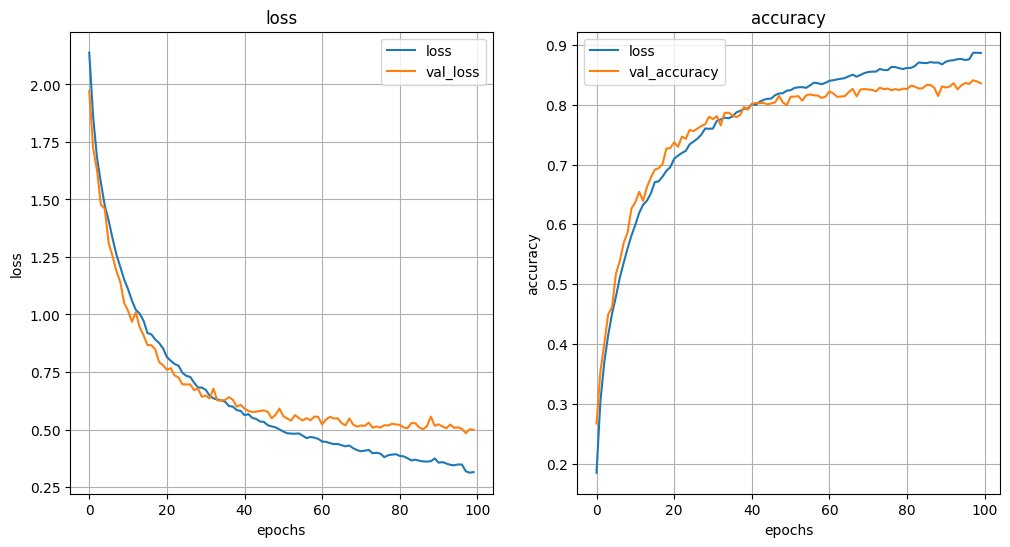

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

## 2-2. 과적합을 낮추기 위한 튜닝2

- 정확도는 상승하였으나, 과적합이 살짝 있어보임.
- dropout 비율을 0.3 -> 0.35로 조정
- learning_rate를 1e-3 -> 1e-4로 조정
- validation_split을 0.2 -> 0.3으로 조정

In [9]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=100, validation_split=.3,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/100
35/35 [==============================] - 8s 125ms/step - loss: 2.3009 - accuracy: 0.1048 - val_loss: 2.2985 - val_accuracy: 0.1202 - lr: 1.0000e-04
Epoch 2/100
35/35 [==============================] - 3s 100ms/step - loss: 2.2754 - accuracy: 0.1246 - val_loss: 2.2208 - val_accuracy: 0.1835 - lr: 1.0000e-04
Epoch 3/100
35/35 [==============================] - 4s 101ms/step - loss: 2.1228 - accuracy: 0.1899 - val_loss: 2.1058 - val_accuracy: 0.2073 - lr: 1.0000e-04
Epoch 4/100
35/35 [==============================] - 4s 102ms/step - loss: 2.0367 - accuracy: 0.2313 - val_loss: 2.0275 - val_accuracy: 0.2489 - lr: 1.0000e-04
Epoch 5/100
35/35 [==============================] - 4s 103ms/step - loss: 1.9960 - accuracy: 0.2469 - val_loss: 1.9943 - val_accuracy: 0.2525 - lr: 1.0000e-04
Epoch 6/100
35/35 [==============================] - 4s 102ms/step - loss: 1.9523 - accuracy: 0.2675 - val_loss: 1.9423 - val_accuracy: 0.2855 - lr: 1.0000e-04
Epoch 7/100
35/35 [=====================

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0131 - accuracy: 0.6433


[1.01308012008667, 0.6432999968528748]

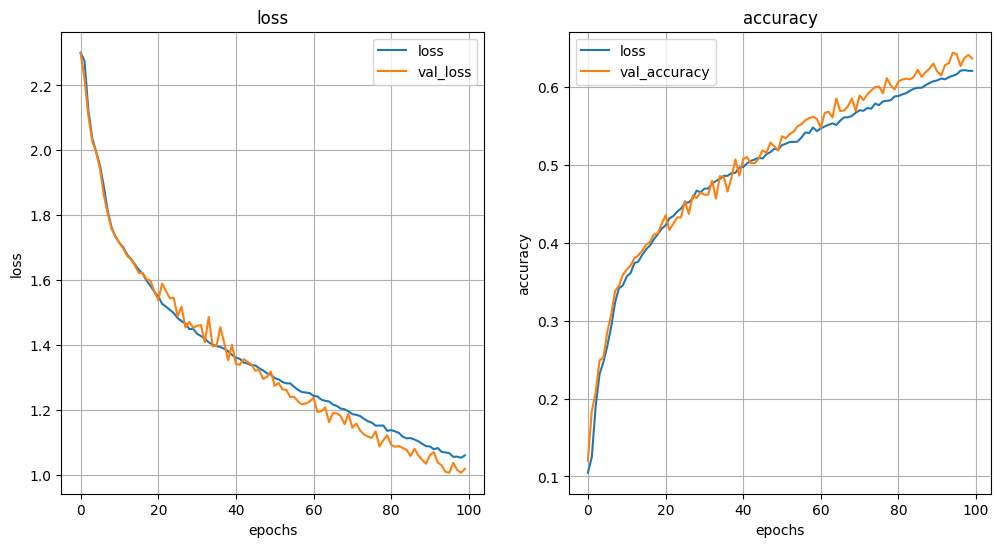

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

## 2-3. 정확도를 높이기 위한 튜닝3

- 과적합이 확연히 좋아졌지만, 정확도가 낮아졌음.

-> validation_split을 0.3 -> 0.25로 조정
-> epochs을 100 -> 150으로 높임.

In [12]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=150, validation_split=.25,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/150
38/38 [==============================] - 9s 154ms/step - loss: 2.3004 - accuracy: 0.1016 - val_loss: 2.2966 - val_accuracy: 0.1018 - lr: 1.0000e-04
Epoch 2/150
38/38 [==============================] - 4s 99ms/step - loss: 2.2731 - accuracy: 0.1202 - val_loss: 2.2241 - val_accuracy: 0.2015 - lr: 1.0000e-04
Epoch 3/150
38/38 [==============================] - 4s 102ms/step - loss: 2.1298 - accuracy: 0.2027 - val_loss: 2.0636 - val_accuracy: 0.2368 - lr: 1.0000e-04
Epoch 4/150
38/38 [==============================] - 4s 100ms/step - loss: 2.0211 - accuracy: 0.2441 - val_loss: 2.0049 - val_accuracy: 0.2590 - lr: 1.0000e-04
Epoch 5/150
38/38 [==============================] - 4s 99ms/step - loss: 1.9476 - accuracy: 0.2711 - val_loss: 1.9178 - val_accuracy: 0.3112 - lr: 1.0000e-04
Epoch 6/150
38/38 [==============================] - 4s 104ms/step - loss: 1.8742 - accuracy: 0.3008 - val_loss: 1.8416 - val_accuracy: 0.3144 - lr: 1.0000e-04
Epoch 7/150
38/38 [=======================

## 2-4. 정확도를 높이기 위한 튜닝 4

- epochs을 150으로 늘렸더니 과적합은 좋게 유지되었고, 정확도도 올랐음
- 그래프를 그려보았을 때도 정확도가 꾸준히 상승했음.
- 학습률은 1e-3에서 가장 좋은 성능을 보이는 듯하여 학습률만 1e-4 -> 1e-3으로 조정

In [13]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-3), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=150, validation_split=.25,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/150
38/38 [==============================] - 8s 129ms/step - loss: 2.1943 - accuracy: 0.1586 - val_loss: 2.0338 - val_accuracy: 0.2413 - lr: 0.0010
Epoch 2/150
38/38 [==============================] - 4s 97ms/step - loss: 1.9173 - accuracy: 0.2896 - val_loss: 1.9099 - val_accuracy: 0.2982 - lr: 0.0010
Epoch 3/150
38/38 [==============================] - 4s 96ms/step - loss: 1.7428 - accuracy: 0.3567 - val_loss: 1.6601 - val_accuracy: 0.3935 - lr: 0.0010
Epoch 4/150
38/38 [==============================] - 4s 100ms/step - loss: 1.6198 - accuracy: 0.3965 - val_loss: 1.5452 - val_accuracy: 0.4394 - lr: 0.0010
Epoch 5/150
38/38 [==============================] - 4s 98ms/step - loss: 1.5069 - accuracy: 0.4398 - val_loss: 1.4394 - val_accuracy: 0.4694 - lr: 0.0010
Epoch 6/150
38/38 [==============================] - 4s 98ms/step - loss: 1.4273 - accuracy: 0.4712 - val_loss: 1.4140 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 7/150
38/38 [==============================] - 4s 101ms/step -

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5094 - accuracy: 0.8341


[0.5093715190887451, 0.8341000080108643]

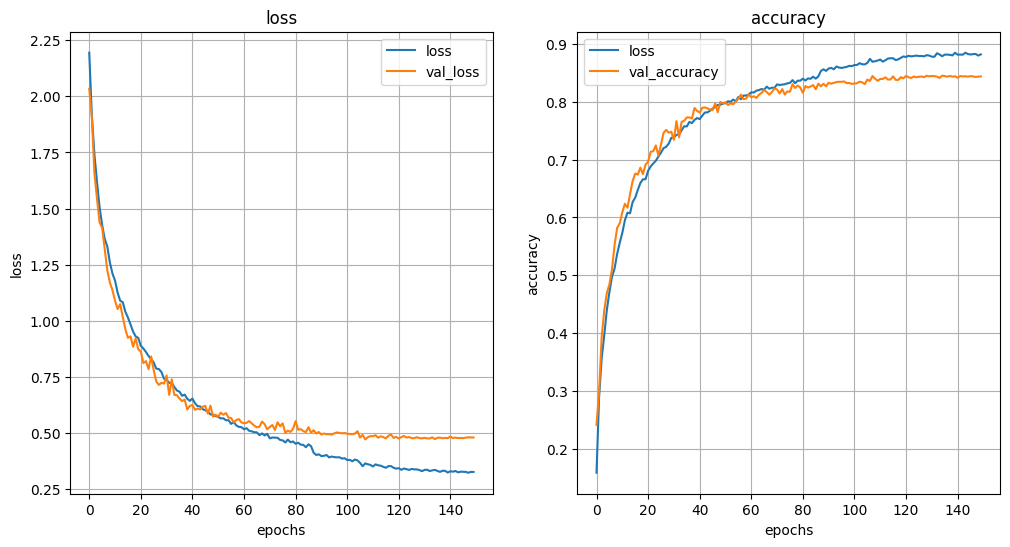

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

In [70]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-3), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=150, validation_split=.25,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/150
38/38 [==============================] - 8s 115ms/step - loss: 2.2092 - accuracy: 0.1576 - val_loss: 2.0365 - val_accuracy: 0.2226 - lr: 0.0010
Epoch 2/150
38/38 [==============================] - 4s 97ms/step - loss: 1.9246 - accuracy: 0.2739 - val_loss: 1.9868 - val_accuracy: 0.2522 - lr: 0.0010
Epoch 3/150
38/38 [==============================] - 4s 99ms/step - loss: 1.7684 - accuracy: 0.3253 - val_loss: 1.6861 - val_accuracy: 0.3645 - lr: 0.0010
Epoch 4/150
38/38 [==============================] - 4s 102ms/step - loss: 1.6427 - accuracy: 0.3750 - val_loss: 1.5559 - val_accuracy: 0.4294 - lr: 0.0010
Epoch 5/150
38/38 [==============================] - 4s 99ms/step - loss: 1.5315 - accuracy: 0.4234 - val_loss: 1.5169 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 6/150
38/38 [==============================] - 4s 99ms/step - loss: 1.4613 - accuracy: 0.4527 - val_loss: 1.5551 - val_accuracy: 0.4245 - lr: 0.0010
Epoch 7/150
38/38 [==============================] - 4s 103ms/step -

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.8386


[0.5094972252845764, 0.8385999798774719]

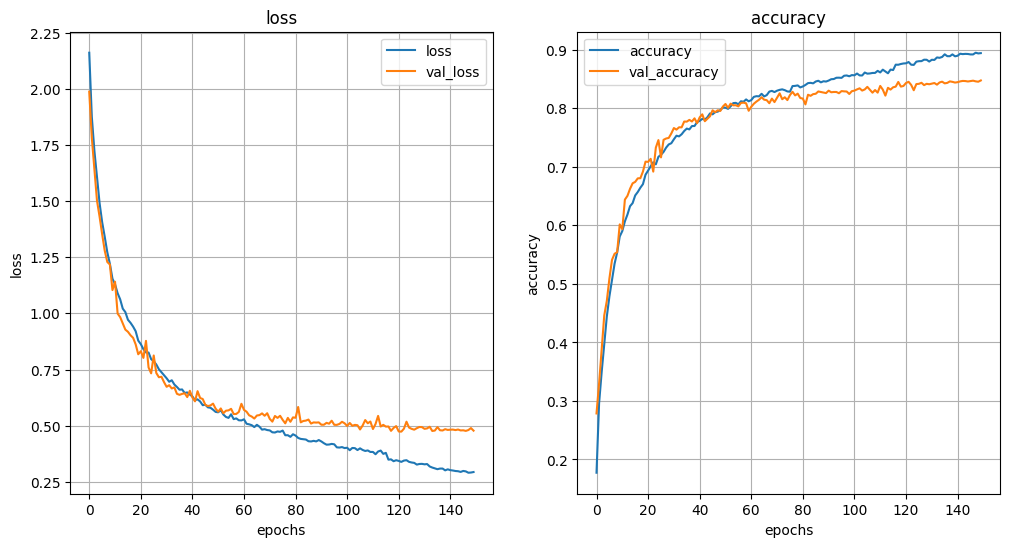

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label="val_loss")
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="accuracy")
plt.plot(result.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="best")

# 3. 오답노트

- pred_comp_val = np.equal(pred_val, y_test)를 사용하여 두 배열 pred_val과 y_test를 비교하면, 예측값과 실제 값이 일치하는지에 대한 불리언 배열이 반환됨.

- 하지만, 두 배열의 차원이 다르기 때문에 원하는 결과가 안나옴.

- y_test의 차원은 2차원이기 때문에 이를 1차원으로 맞춰줘야 함.

In [32]:
y_test.shape

(10000, 1)

In [40]:
y_test_reshaped = y_test.reshape(-1)

In [ ]:
ret_val = model.predict(X_test)

ret_val.shape

In [24]:
pred_val = np.argmax(ret_val, axis=1)
pred_val

In [41]:
pred_comp_val = np.equal(pred_val, y_test_reshaped)
pred_comp_val

In [44]:
index_label_pred_list = [[idx, y_test[idx], pred_val[idx]] for idx, result in enumerate(pred_comp_val) if result == False]

In [45]:
len(index_label_pred_list)

1614

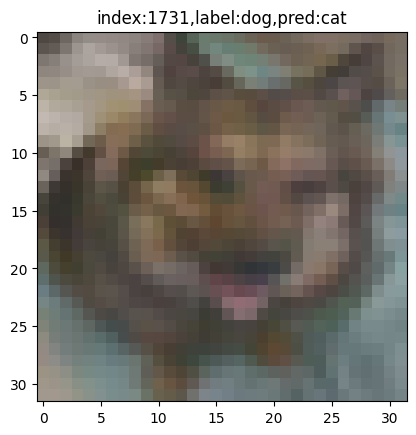

In [69]:
false_data_index = np.random.randint(len(index_label_pred_list))    # 랜덤으로 오답노트 안에 하나의 원소를 뽑아오기

cifar10_index = index_label_pred_list[false_data_index][0]    # 인덱스
label = index_label_pred_list[false_data_index][1][0]          # 정답
pred = index_label_pred_list[false_data_index][2]           # 예측

label_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
pred_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

img = X_test[mnist_index]

title = "index:" + str(cifar10_index) + "," + "label:" + label_list[label] + "," + "pred:" + pred_list[pred]         # 0인데 6이라고 잘못 예측한 것.
plt.title(title)
plt.imshow(img)   # 컬러 이미지(3개의 채널: RGB)인 경우에는 cmap 매개변수를 사용하지 않음.

# 강아지인데 고양이로 잘못 예측한 사진들이 있음.

# 4. 예측

- cifar10의 데이터를 살펴보면 label은 다음과 같음
  ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
---
- 이에 인터넷에서 새로운 사진을 다운받고 예측
---
- 알집으로 압축한 후,
  - 1. gdrive에 올려서 코랩과 mount해주기
  - 2. 알집파일의 용량이 작다면 드래그를 통해 간단히업로드해주기

In [ ]:
import cv2
import zipfile
import os
import shutil
import glob

## 4-1 새로운 이미지 준비 및 전처리

In [ ]:
with zipfile.ZipFile("data/photo.zip", "r") as target_file:  # as 뒤에는 원하는 변수명 적어주면 됨.
  target_file.extractall("/content/photo")                   # content/photo 폴더에 압축풀기
  print("success")

In [ ]:
src_img1 = cv2.imread("/content/photo/cat_1.jpg", cv2.IMREAD_COLOR)  # cv2.IMREAD_COLOR 옵션은 이미지를 컬러 이미지로 로드하도록 지정하는 인자

plt.figure(figsize=(8,6))

plt.imshow(src_img1)
plt.axis("off")             # 이미지의 색상이 RGB기준이 아닌 BGR의 모습으로 되어 있음.

In [ ]:
# cv2.cvtColor 은 OpenCV에서 이미지의 컬러 스페이스를 변환하는 함수
# OpenCV는 기본적으로 BGR 컬러 순서를 사용하기 때문에, cv2.COLOR_BGR2RGB 를 통해 BGR을 RGB로 바꿔주는 과정이 필요
dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))

plt.imshow(dst_img1)
plt.axis("off")             # 이미지의 색상이 정상적으로 나오는 것을 알 수 있음.

In [ ]:
src_img_list = []
dst_img_list = []

img_file_list = glob.glob("/content/photo/*")

for i in img_file_list:
  src_img = cv2.imread(i, cv2.IMREAD_COLOR)               # 이미지를 컬러 이미지로 불러들임
  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)      # BGR 을 RGB 로 바꿔줌.
  dst_img = cv2.resize(dst_img, dsize=(32, 32))           # 이미지 사이즈를 32, 32로 재조정
  dst_img = dst_img / 255.0                               # 이미지 정규화

  print(src_img.shape, dst_img.shape)

  src_img_list.append(src_img)
  dst_img_list.append(dst_img)

In [ ]:
plt.figure(figsize=(8,8))

for i in range(len(src_img_list)):
    plt.subplot(3, 5, i+1)
    plt.imshow(src_img_list[i])
    plt.axis("off")
    plt.tight_layout()